### Importar Bibliotecas e Bases de Dados

In [312]:
import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import time
import numpy as np



### Agora vamos importar as bases de dados


In [313]:
import pandas as pd

# URL do arquivo CSV
url = 'https://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2024-12-27/visualisations/listings.csv'

# Lendo o arquivo CSV diretamente da URL
base_airbnb = pd.read_csv(url)

# Visualizando as 5 primeiras entradas
base_airbnb.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,1471.0,5,327,2024-12-27,1.86,1,279,16,NaN
1,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97649,-43.19122,Entire home/apt,850.0,2,304,2024-12-26,1.71,1,211,29,NaN
2,35764,COPACABANA SEA BREEZE - RIO - 25 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98107,-43.19136,Entire home/apt,324.0,3,498,2024-12-20,2.87,1,71,42,NaN
3,48305,Bright 6bed Penthouse Seconds from Beach,70933,Goitaca,NaN,Ipanema,-22.98591,-43.20302,Entire home/apt,3532.0,7,180,2024-10-01,1.07,6,319,16,NaN
4,48901,Extra large 4BD 3BT on the AtlanticAve. Copaca...,222884,Marcio,NaN,Copacabana,-22.96574,-43.17514,Entire home/apt,NaN,3,39,2024-12-15,0.34,1,304,15,NaN


### Análise Exploratória e Tratar Outliers

In [314]:
# Quantidade de linhas e colunas do banco de dados
print('Entradas: {} \t'.format(base_airbnb.shape[0]))
print('Colunas/Variáveis: {} \t'.format(base_airbnb.shape[1]))

Entradas: 39499 	
Colunas/Variáveis: 18 	


In [315]:
# informações a respeito do tipo de dado das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39499 entries, 0 to 39498
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39499 non-null  int64  
 1   name                            39499 non-null  object 
 2   host_id                         39499 non-null  int64  
 3   host_name                       39497 non-null  object 
 4   neighbourhood                   39499 non-null  object 
 5   latitude                        39499 non-null  float64
 6   longitude                       39499 non-null  float64
 7   room_type                       39499 non-null  object 
 8   price                           36644 non-null  float64
 9   minimum_nights                  39499 non-null  int64  
 10  number_of_reviews               39499 non-null  int64  
 11  last_review                     29080 non-null  object 
 12  reviews_per_month               

In [316]:
df[['neighbourhood', 'room_type']].value_counts()

neighbourhood             room_type      
Copacabana                Entire home/apt    10571
Ipanema                   Entire home/apt     3145
Barra da Tijuca           Entire home/apt     3074
Copacabana                Private room        1712
Recreio dos Bandeirantes  Entire home/apt     1708
                                             ...  
Taquara                   Shared room            1
Cocotá                    Entire home/apt        1
Abolição                  Private room           1
Pedra de Guaratiba        Shared room            1
Cordovil                  Entire home/apt        1
Name: count, Length: 331, dtype: int64

In [317]:
# informações estatísticas sobre o banco de dados
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month
count,36644.000000,39499.000000,39499.000000,29080.000000
mean,1227.121712,3.939467,22.974708,1.150685
std,3766.946404,21.842533,45.370365,1.258667
min,33.000000,1.000000,0.000000,0.010000
25%,400.000000,1.000000,0.000000,0.250000
50%,728.000000,2.000000,5.000000,0.730000
75%,1200.000000,3.000000,25.000000,1.670000
max,500000.000000,1000.000000,710.000000,14.620000


Preço (price)
- Média: O preço médio dos imóveis é R$ 1.227, mas com um desvio padrão alto de R$ 3.766, o que indica que existem grandes variações nos preços.
- Mínimo: O preço mínimo é R$ 33, o que é bastante baixo, indicando a existência de algumas ofertas muito baratas.
- Máximo: O preço máximo é R$ 500.000, sugerindo que existem imóveis de luxo ou muito exclusivos na base de dados.
- Percentis:
    - 25% dos imóveis têm preço até R$ 400.
    - 50% (mediana) dos imóveis têm preço até R$ 728.
    - 75% dos imóveis têm preço até R$ 1.200, o que indica que a maioria dos imóveis fica em uma faixa de preço de até R$ 1.200.

Noite Mínima (minimum_nights)
- Mínimo: O valor mínimo de 1 noite indica que existem imóveis disponíveis para aluguel de curto período.
- Máximo: O valor máximo de 1000 noites provavelmente indica imóveis com requisitos de reserva muito longos ou listagens com erros.

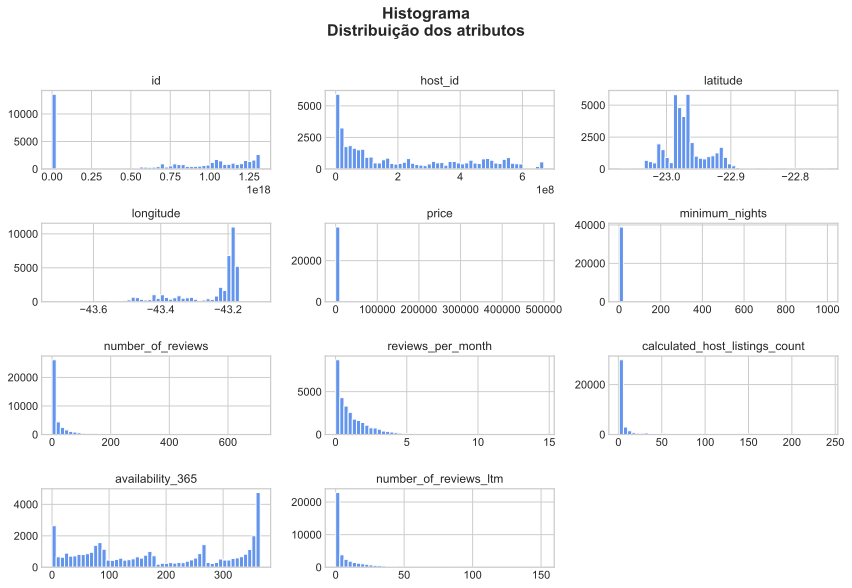

In [318]:
# Filtra somente colunas numéricas
colunas_numericas = df.select_dtypes(include=['int64', 'float64'])

# Gera os histogramas
colunas_numericas.hist(bins=50, figsize=(12, 8), color='cornflowerblue')

plt.suptitle('Histograma\nDistribuição dos atributos', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### Tratar Valores Faltando

In [319]:
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

last_review                       26.377883
reviews_per_month                 26.377883
price                              7.228031
host_name                          0.005063
id                                 0.000000
name                               0.000000
host_id                            0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

Altos percentuais de valores nulos:
- last_review e reviews_per_month têm 26,38% de valores nulos, o que é um percentual considerável. Isso indica que muitas propriedades podem não ter recebido avaliações recentes ou mensais, o que pode ser esperado para novos imóveis ou para aqueles com pouca visibilidade.

Baixo percentual de valores nulos:
- price tem apenas 7,23% de valores nulos, o que é relativamente baixo, mas ainda assim deve ser tratado, já que o preço é uma variável importante para análise de dados.
- host_name tem um percentual de 0,005%, indicando que a grande maioria dos registros tem informações sobre o nome do anfitrião.


In [320]:
# bairros com maiores concentração de casas
df['neighbourhood'].value_counts().sort_values(ascending=False)[:10]

neighbourhood
Copacabana                  12352
Barra da Tijuca              3612
Ipanema                      3570
Recreio dos Bandeirantes     2060
Jacarepaguá                  1848
Leblon                       1767
Botafogo                     1709
Centro                       1660
Santa Teresa                 1246
Flamengo                      889
Name: count, dtype: int64

### Definição de Funções para Análise de Outliers

Vamos definir algumas funções para ajudar na análise de outliers das colunas

In [321]:
def limites(coluna):
    q1 = coluna.quantile(0.25)  # Primeiro quartil
    q3 = coluna.quantile(0.75)  # Terceiro quartil
    amplitude = q3 - q1  # Amplitude interquartil
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude  # Limites inferior e superior


def excluir_outliers(df, nome_coluna):
    qtde_linhas = df.shape[0]  # Pega a quantidade de linhas atuais
    lim_inf, lim_sup = limites(df[nome_coluna])  # Calcula os limites inferior e superior para a coluna
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]  # Filtra os dados
    linhas_removidas = qtde_linhas - df.shape[0]  # Calcula o número de linhas removidas
    return df, linhas_removidas  # Retorna o DataFrame filtrado e o número de linhas removidas


### FUNÇÕES DE GRÁFICO

In [322]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(13, 1)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)

    
def histograma(coluna):
    fig = px.histogram(coluna, nbins=30, title=f'Histograma de {coluna.name}')
    fig.update_layout(xaxis_title=coluna.name, yaxis_title='Frequência')
    fig.show()


def grafico_barra(coluna):  
    # Contagem dos valores
    conta_valores = coluna.value_counts().reset_index()
    conta_valores.columns = ['Valor', 'Contagem']  # Renomeando as colunas
    
    # Definindo os limites
    lim_inf, lim_sup = limites(coluna)
    
    # Criando o gráfico de barras verticais com categorias no eixo Y
    fig = px.bar(conta_valores, y='Valor', x='Contagem', 
                 title=f'Contagem de valores em {coluna.name}')
    
    # Ajustando os limites do eixo X
    fig.update_layout(
        xaxis_title='Contagem', 
        yaxis_title='Categorias', 
        showlegend=False, 
        xaxis=dict(range=[lim_inf, lim_sup])
    )
    
    fig.show()


### Visualização de Mapa das Propriedades

Vamos criar um mapa que exibe um pedaço da nossa base de dados aleatório (50.000 propriedades) para ver como as propriedades estão distribuídas pela cidade e também identificar os locais de maior preço 

### price e minimum_nights

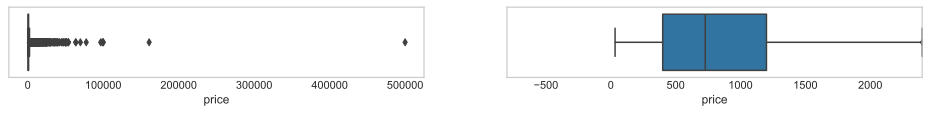

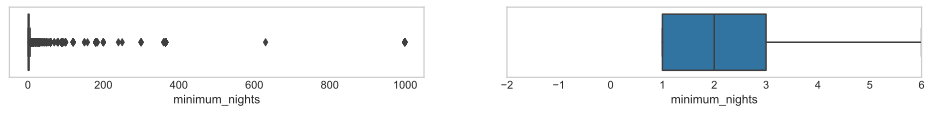

In [323]:
diagrama_caixa(base_airbnb['price'])
diagrama_caixa(base_airbnb['minimum_nights'])


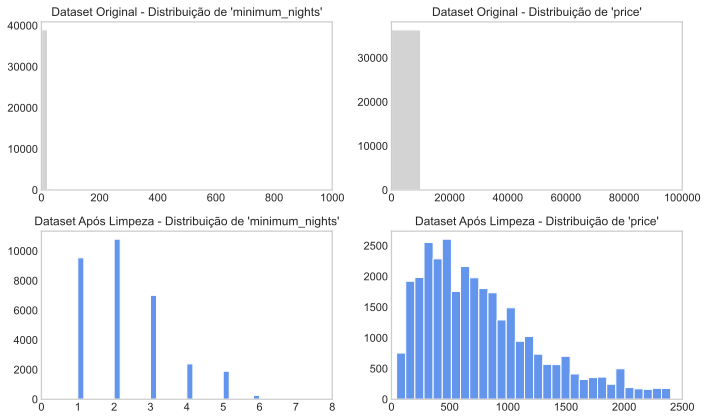

In [324]:
import matplotlib.pyplot as plt

# Cópia dos dados originais
df_original = base_airbnb.copy()

# Limpeza de outliers com suas funções
df_limpo = df_original.copy()
df_limpo, _ = excluir_outliers(df_limpo, 'price')
df_limpo, _ = excluir_outliers(df_limpo, 'minimum_nights')

# Criando os subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Dataset Original - minimum_nights
axs[0, 0].hist(df_original['minimum_nights'], bins=50, color='lightgray')
axs[0, 0].set_title("Dataset Original - Distribuição de 'minimum_nights'")
axs[0, 0].set_xlim([0, 1000])

# Dataset Original - price
axs[0, 1].hist(df_original['price'], bins=50, color='lightgray')
axs[0, 1].set_title("Dataset Original - Distribuição de 'price'")
axs[0, 1].set_xlim([0, 100000])

# Dataset Limpo - minimum_nights
axs[1, 0].hist(df_limpo['minimum_nights'], bins=30, color='cornflowerblue')
axs[1, 0].set_title("Dataset Após Limpeza - Distribuição de 'minimum_nights'")
axs[1, 0].set_xlim([0, 8])

# Dataset Limpo - price
axs[1, 1].hist(df_limpo['price'], bins=30, color='cornflowerblue')
axs[1, 1].set_title("Dataset Após Limpeza - Distribuição de 'price'")
axs[1, 1].set_xlim([0, 2500])

plt.tight_layout()
plt.show()


# definindo a tabela de correlação


In [354]:
# Calculando a matriz de correlação
corr_matrix = base_airbnb[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']].corr()

# Exibindo a matriz de correlação
sns.heatmap(corr, cmap='Blues', fmt='.2f', square=True, linecolor='white', annot=True);




NameError: name 'corr' is not defined

## Tipo de imovel mais alugado

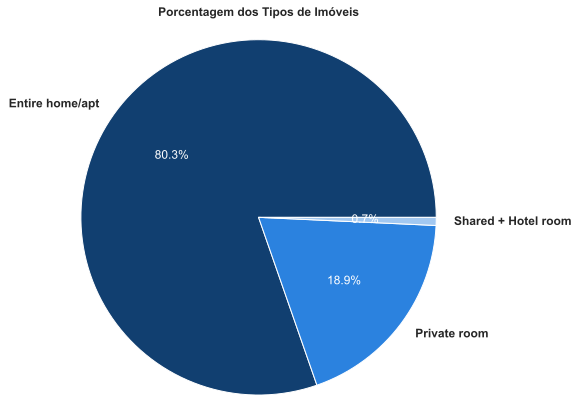

In [353]:
import matplotlib.pyplot as plt

# Agrupando os tipos menos frequentes
room_counts = base_airbnb['room_type'].value_counts()

# Mantendo os dois mais comuns, agrupando os demais
top_labels = room_counts.index[:2]  # Pega os dois primeiros
top_sizes = room_counts.values[:2]  # Pega os valores dos dois primeiros

# Soma das demais categorias
others_size = room_counts.values[2:].sum()
others_label = 'Shared + Hotel room'

# Novas listas com os valores agrupados
labels = list(top_labels) + [others_label]
sizes = list(top_sizes) + [others_size]


# Definindo tons de azul pastel
blue_pastel_colors = ['#113f70', '#2b82df', '#a2c8f1', '#e6f0fb']

# Garantindo que o número de cores seja suficiente para o número de fatias
colors = blue_pastel_colors[:len(labels)]

# Criando o gráfico de pizza
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=0, counterclock=True
)


# Deixando os textos em negrito
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')
    text.set_fontweight('bold')

# Deixando as porcentagens em negrito e colorindo-as de branco
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('white')  # Cor das porcentagens


plt.title('Porcentagem dos Tipos de Imóveis', fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()


### Visualização de Mapa das Propriedades

Vamos criar um mapa que exibe um pedaço da nossa base de dados aleatório (50.000 propriedades) para ver como as propriedades estão distribuídas pela cidade e também identificar os locais de maior preço 

In [ ]:
amostra = base_airbnb.sample(n=10000)
centro_mapa = {'lat': amostra.latitude.mean(), 'lon': amostra.longitude.mean()}

mapa = px.scatter_mapbox(amostra, 
                         lat='latitude', 
                         lon='longitude', 
                         color='price',  # Colore os pontos pelo preço
                         size_max=5,     # Tamanho máximo dos pontos
                         center=centro_mapa, 
                         zoom=10, 
                         mapbox_style='carto-positron')

mapa.show()


In [ ]:
amostra = base_airbnb.sample(n=10000)
centro_mapa = {'lat': amostra.latitude.mean(), 'lon': amostra.longitude.mean()}

mapa = px.density_mapbox(amostra, 
                         lat='latitude', 
                         lon='longitude', 
                         z='price', 
                         radius=10,
                         center=centro_mapa, 
                         zoom=10,
                         mapbox_style='carto-positron')

mapa.show()


In [ ]:
# as 10 regiões com alguel mais caro
base_airbnb.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]